In [7]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift


WAVELENGTH vs DISPLACEMENT for VARIOUS AIRMASSES, AND DISPLACEMENT vs AIRMASS for VARIOUS WAVELENGTHS

In [8]:
#HA PLOTS:
def shift_plot(input_parameters,output_parameters,conditions):
    if input_parameters['HA_range'] != []: #If plot is True and HA values are used, plot the 2 graphs
        HA_range=input_parameters['HA_range']
        HA_to_ZA_range=atm_diff.HA_2_ZA(HA_range,input_parameters['targ_dec'])
        print(HA_to_ZA_range)
        #1) wavelength vs displacement for different HA 
        centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
        T_arc = lambda T_mm: T_mm * analysis.plate_scale
        T_mm = lambda T_arc: T_arc / analysis.plate_scale
        fig, ax = plt.subplots(figsize=(10,7))
        ax2 = ax.secondary_yaxis("right", functions=(T_arc, T_mm))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axhline(-centre_shift.value,linewidth=0.5,color='red', label='Wavelength Reference Centre')
        for i in range(0,len(output_parameters['airmasses'])):
            plt.plot(output_parameters['wave_wavelengths'],output_parameters['shifts'][i],label="HA = %2.2fh" %(HA_range[i]))
        plt.axhline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axhline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axhline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.title('Wavelength Reference %s, Fibre Centre on %s, Dec = %2.2f deg' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref'],input_parameters['targ_dec'].value))
        plt.legend(loc='best')

        ax.set_ylabel('Displacement from Fibre Centre (arcsec)')
        ax2.set_ylabel('Displacement from Fibre Centre (mm)')
        ax.set_xlabel('Wavelength (nm)')

        #2) Displacement vs HA for different wavelengths
        to_HA = lambda ZA_vals: atm_diff.ZA_2_HA(ZA_vals,input_parameters['targ_dec'])
        to_ZA = lambda HA_vals: atm_diff.HA_2_ZA(HA_vals,input_parameters['targ_dec'])
        fig, ax = plt.subplots(figsize=(10,7))
        ax2 = ax.secondary_yaxis("right", functions=(to_ZA, to_HA))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axvline(-centre_shift.value,linewidth=0.5,color='red',label='Wavelength Reference Centre')
        xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
        c=np.tan(xvals)
        for i in range(0,len(output_parameters['shifts'])):
            yvals=np.full(len(output_parameters['shifts'][i]),HA_range[i])
            plt.scatter(output_parameters['shifts'][i],yvals,c=c)
            norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
            points = np.array([output_parameters['shifts'][i], yvals]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(output_parameters['wave_wavelengths'].value)
            lc.set_linewidth(2)
            line=ax.add_collection(lc)
        fig.colorbar(line)
        plt.axvline(0,linewidth=0.7,color='black',label='Fibre Centre')
        plt.axvline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axvline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.xlabel('Displacement from Fibre Centre (arcsec)')
        plt.ylabel('Hour Angle (h)')
        ax2.set_ylabel("Zenith Angle (deg)")
        plt.yticks(np.linspace(min(HA_range),max(HA_range),len(HA_range)))
        plt.legend()
        plt.title('Wavelength Reference %s, Fibre Centre on %s, Dec = %2.2f deg' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref'],input_parameters['targ_dec'].value))    

    #ZA PLOTS
    if input_parameters['ZA_range'] != []: #If plot is True and Zenith Angle values are used, plot the 2 graphs
        ZA_range=input_parameters['ZA_range']

        #1) wavelength vs displacement for different HA 
        centre_shift=atm_diff.diff_shift(input_parameters['fibrecentre_waveref'],output_parameters['airmasses'][0],input_parameters['guide_waveref'],conditions)
        T_arc = lambda T_mm: T_mm * analysis.plate_scale
        T_mm = lambda T_arc: T_arc / analysis.plate_scale
        fig, ax = plt.subplots(figsize=(10,7))
        ax2 = ax.secondary_yaxis("right", functions=(T_arc, T_mm))
        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axhline(-centre_shift.value,linewidth=0.5,color='red', label='Wavelength Reference Centre')
        for i in range(0,len(output_parameters['airmasses'])):
            plt.plot(output_parameters['wave_wavelengths'],output_parameters['shifts'][i],label="ZA = %2.2f deg" %(ZA_range[i]))
        plt.axhline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axhline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axhline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.title('Wavelength Reference %s, Fibre Centre on %s' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref']))
        plt.legend(loc='best')
        ax.set_ylabel('Displacement from Fibre Centre (arcsec)')
        ax2.set_ylabel('Displacement from Fibre Centre (mm)')
        ax.set_xlabel('Wavelength (nm)')

        #2) Displacement vs ZA for different wavelengths
        fig, ax = plt.subplots(figsize=(10,7))

        if input_parameters['reposition'] == False: #If repositioned, wavelength reference centre is meaningless as relative position changes
            plt.axvline(-centre_shift.value,linewidth=0.5,color='red',label='Wavelength Reference Centre')
        xvals=np.linspace(-1,1,len(output_parameters['wave_wavelengths']))
        c=np.tan(xvals)
        for i in range(0,len(output_parameters['shifts'])):
            yvals=np.full(len(output_parameters['shifts'][i]),ZA_range[i])
            plt.scatter(output_parameters['shifts'][i],yvals,c=c)
            norm = plt.Normalize(output_parameters['wave_wavelengths'].value.min(), output_parameters['wave_wavelengths'].value.max())
            points = np.array([output_parameters['shifts'][i], yvals]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap='viridis', norm=norm)
            lc.set_array(output_parameters['wave_wavelengths'].value)
            lc.set_linewidth(2)
            line=ax.add_collection(lc)
        fig.colorbar(line)
        plt.axvline(0,linewidth=0.8,color='black',label='Fibre Centre')
        plt.axvline(output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',label='Fibre Boundary',linestyle='--')
        plt.axvline(-output_parameters['fibre_diameter'].value/2,linewidth=0.8,color='black',linestyle='--')
        plt.xlabel('Displacement from Fibre Centre (arcsec)')
        plt.ylabel('Zenith Angle (deg)')
        plt.yticks(np.linspace(min(ZA_range),max(ZA_range),len(ZA_range)))
        plt.legend()
        plt.title('Wavelength Reference %s, Fibre Centre on %s' %(input_parameters['guide_waveref'],input_parameters['fibrecentre_waveref']))    

HA used
Target goes below Horizon above/below HA of +/- 5.7h
[34.6272     37.59315339 45.33753609 55.89851346]


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


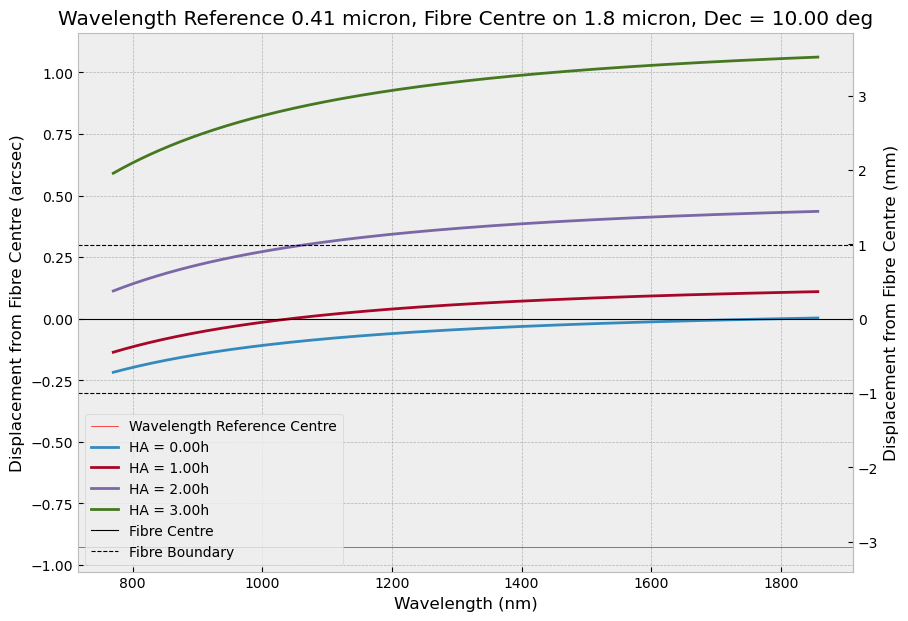

/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/Work/Mosaic/ADC/ADC Code/Version 2/Atmospheric_diffraction.py:114: RuntimeWarning: invalid value encountered in arccos
  HA = np.arccos((np.sin(alt)-np.sin(lat)*np.sin(dec))/(np.cos(lat)*np.cos(dec)))


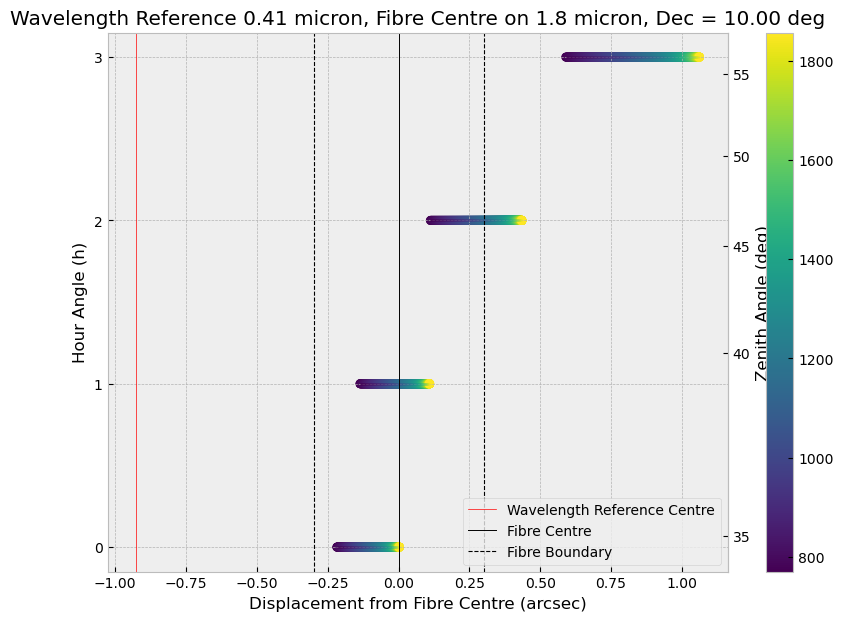

In [9]:
analysis=AD_analysis()
analysis.load_airmasses(HA_range=[0,1,2,3],targ_dec=10 * u.deg)
analysis.load_wave("LR","NIR","IY","H",sampling=1*u.nm)
analysis.calculate_shifts(fibrecentre_waveref = 1.8 * u.micron,reposition=False,guide_waveref=0.41*u.micron)
input_parameters=analysis.input_parameters
output_parameters=analysis.output_parameters
conditions=analysis.conditions
shift_plot(input_parameters,output_parameters,conditions)

Zenith Angles Used
1030
Movement of NIR Fibre Centre from Start to End = 0.49992584117896965 arcsec


/opt/anaconda3/envs/astrocondatest/lib/python3.7/site-packages/ipykernel_launcher.py:97: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


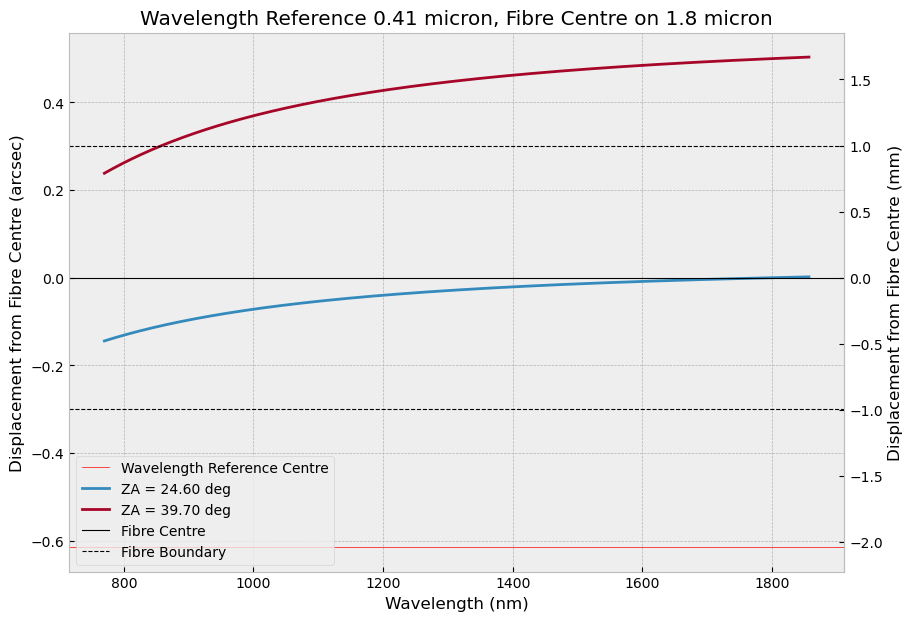

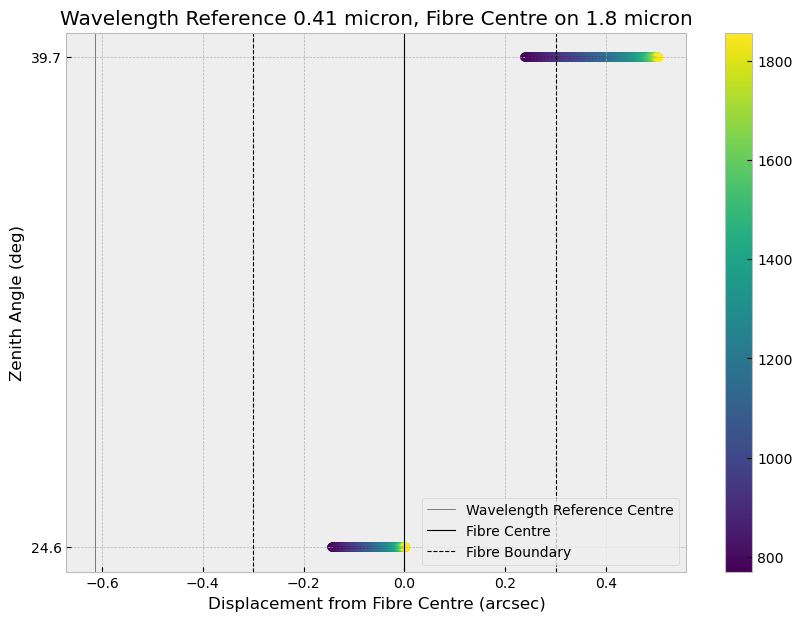

In [10]:
# analysis=AD_analysis()
# analysis.load_airmasses(ZA_range=[34.627, 37.59315339, 45.33753609, 55.89851346])
# analysis.load_wave("LR","VIS","B","B",sampling=1*u.nm)
# analysis.calculate_shifts(fibrecentre_waveref = 0.44 * u.micron,reposition=False)
# shift_plot(analysis.input_parameters,analysis.output_parameters,conditions)

analysis=AD_analysis()
analysis.load_airmasses(ZA_range=[24.6,39.7])
analysis.load_wave("LR","NIR","IY","H",sampling=1*u.nm)
analysis.calculate_shifts(fibrecentre_waveref = 1.8 * u.micron,reposition=False,guide_waveref=0.41*u.micron)
fibre_index=abs(int((analysis.output_parameters['wave_wavelengths'][0].value-1.8*1000)/1)) #sampling = 1
print(fibre_index)
print("Movement of NIR Fibre Centre from Start to End = {}".format(abs(analysis.output_parameters['shifts'][0][fibre_index]-analysis.output_parameters['shifts'][-1][fibre_index])))
shift_plot(analysis.input_parameters,analysis.output_parameters,conditions)

TRANSMISSION vs WAVELENGTH for VARIOUS AIRMASS


In [11]:
def trans_plot(input_parameters,output_parameters,conditions,normalise="none"):
    """
    Plots the wavelength vs transmission graph 
    Comes after load_wave, load_airmasses, calculate_snapshifts, calculate_snaptransmissions

    INPUTS:
    normalise: string, "none", "zenith", "centre", "both"
        what to normalise the transmission to; either no normalisation, relative to zenith, relative to transmission or fibre centre wavelength,
        or both the latter

    OUTPUTS:
    Graphs:
        corresponding graph
    """
    airmasses=output_parameters['airmasses']
    ZA_range=input_parameters['ZA_range']
    HA_range=input_parameters['HA_range']
    
    wave_wavelengths=output_parameters['wave_wavelengths']
    fibre_diameter=output_parameters['fibre_diameter']
    wave_transmissions=output_parameters['wave_transmissions']

    fibrecentre_waveref=input_parameters['fibrecentre_waveref']
    guide_waveref=input_parameters['guide_waveref']
    median_FWHM=input_parameters['median_FWHM']
    median_FWHM_lambda=input_parameters['median_FWHM_lambda']
    kolb_factor=input_parameters['kolb_factor']
    regime=input_parameters['regime']
    res=input_parameters['res']
    k_lim=input_parameters['k_lim']
    FWHM_change=input_parameters['FWHM_change']
    scale=input_parameters['scale']
    method=input_parameters['method']
    beta=input_parameters['beta']
    band=input_parameters['band']
    reposition=input_parameters['reposition']
    targ_dec=input_parameters['targ_dec']

    weights = np.arange(1, len(airmasses)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)

    if ZA_range !=[]: #Zenith angle plots
        fig, ax = plt.subplots(figsize=(10,7))
        plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Fibre Centre Wavelength')

        if normalise == "zenith":
            print("Normalised to Zenith Transmission")
            if FWHM_change==True:
                zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            zenith_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
            zenith_shifts=atm_diff.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
            if method == "analytical":
                zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
            if method == "numerical gaussian":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
            if method == "numerical moffat":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Zenith")

        if normalise == "centre":
            print("Normalised to Reference Wavelength Transmission")
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]          
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Reference Wavelength")

        if normalise =="both":
            print("Normalised to Both Zenith Transmission and Reference Wavelength Transmission")
            if FWHM_change==True:
                zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            zenith_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
            zenith_shifts=atm_diff.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
            if method == "analytical":
                zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
            if method == "numerical gaussian":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
            if method == "numerical moffat":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(zenith_transmission)[peak]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))
                plt.ylabel("Transmission (Normalised to Zenith and Ref. Wave. Transmission)")

        if normalise == "none":
            print("No Normalisation, Raw Transmission")
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission")

        plt.xlabel("Wavelength [nm]")
        #plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Repos = %s, Method = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,reposition,method))

        plt.ylim(0,1.3)
        
        plt.legend()

    if HA_range != []: #HA plots
        fig, ax = plt.subplots(figsize=(10,7))
        plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Fibre Centre Wavelength')
        meridian_airmass=output_parameters['meridian_airmass']
        if normalise == "meridian":
            print("Normalised to Target's Meridian Transmission (LHA=0h)")
            if FWHM_change==True:
                merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            merid_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
            merid_shifts=atm_diff.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
            if method == "analytical":
                merid_transmission = trans_calc.analytical_gaussian(fibre_diameter,merid_FWHMs,merid_shifts,k_lim)
            if method == "numerical gaussian":
                merid_transmission = []
                for i in range(0,len(merid_FWHMs)):
                    merid_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale))
            if method == "numerical moffat":
                merid_transmission = []
                for i in range(0,len(merid_FWHMs)):
                    merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission),label='HA = %2.2fh' %(HA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission Relative to Target's at Meridian")

        if normalise == "centre":
            print("Normalised to Reference Wavelength Transmission")
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='HA = %2.2fh' %(HA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission Relative to Reference Wavelength")

        if normalise =="both":
            print("Normalised to Both Target's Meridian Transmission and Reference Wavelength Transmission")
            if FWHM_change==True:
                merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            merid_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
            merid_shifts=atm_diff.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
            if method == "analytical":
                merid_transmission = trans_calc.analytical_gaussian(fibre_diameter,merid_FWHMs,merid_shifts,k_lim)
            if method == "numerical gaussian":
                merid_transmission = []
                for i in range(0,len(merid_FWHMs)):
                    merid_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale))
            if method == "numerical moffat":
                merid_transmission = []
                for i in range(0,len(merid_FWHMs)):
                    merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(merid_transmission)[peak]),label='HA = %2.0fh' %(HA_range[i]),color=cmap.to_rgba(i+1))
                plt.ylabel("Transmission (Normalised to Target at Meridian and Ref. Wave. Transmission)")

        if normalise == "none":
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='HA = %2.2fh' %(HA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission")

        plt.xlabel("Wavelength [nm]")
        #plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Dec = %2.2f, Repos = %s, Method = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,targ_dec.value,reposition,method))
        plt.ylim(0,1.3)
        plt.legend()

HA used


/Users/Jay.Stephan/Library/CloudStorage/OneDrive-ScienceandTechnologyFacilitiesCouncil/Documents/Work/Mosaic/ADC/ADC Code/Version 2/AD_analysis.py:143: RuntimeWarning: invalid value encountered in arccos
  LHA_below_horizon=np.rad2deg(np.arccos(-np.tan(lat)*np.tan(dec)))/15 #Local Hour Angle the target goes below the Horizon


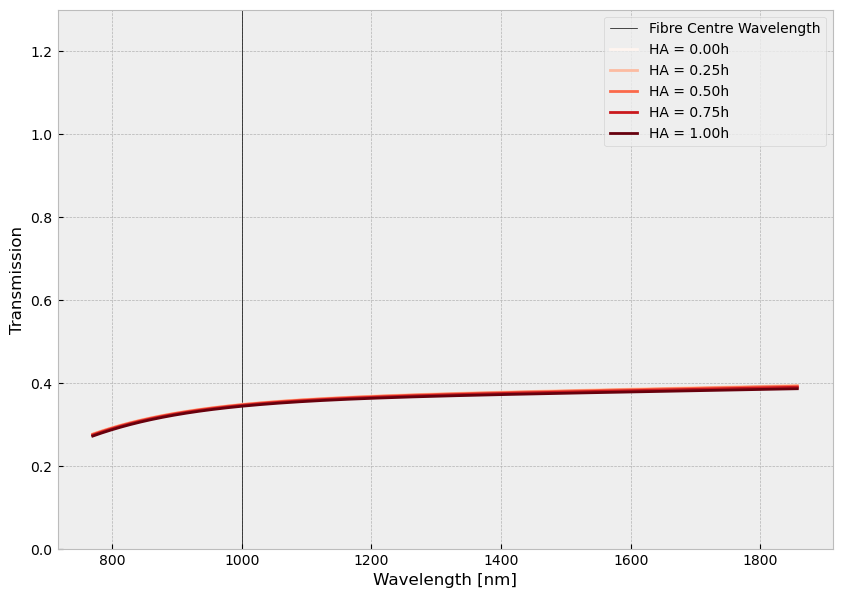

In [12]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
#analysis.load_airmasses(ZA_range=[0,5,10,15,20,25,30,35,40,45,50,55,60])
analysis.load_airmasses(HA_range=[0,0.25,0.5,0.75,1],targ_dec=-70 * u.deg)
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="none")

Zenith Angles Used
Normalised to Reference Wavelength Transmission
Zenith Angles Used
Normalised to Reference Wavelength Transmission


IndexError: index 0 is out of bounds for axis 0 with size 0

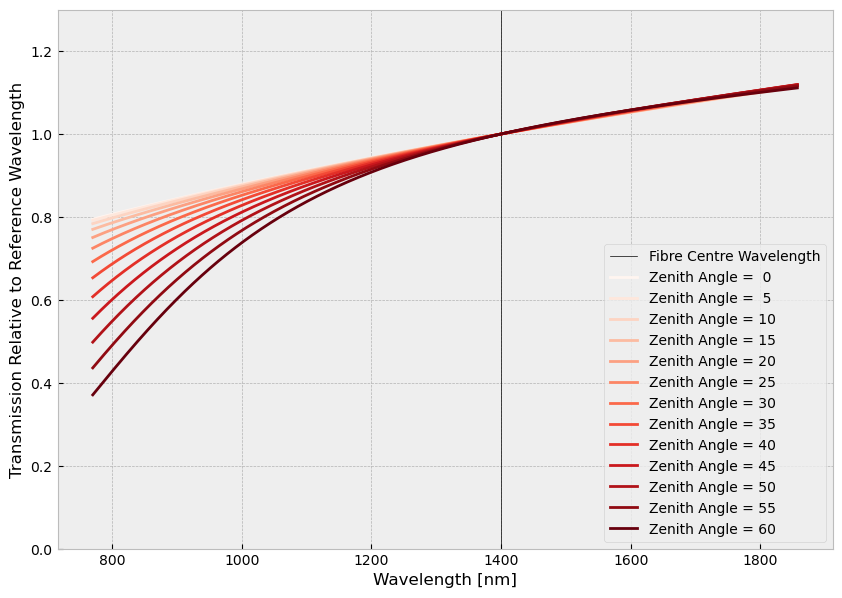

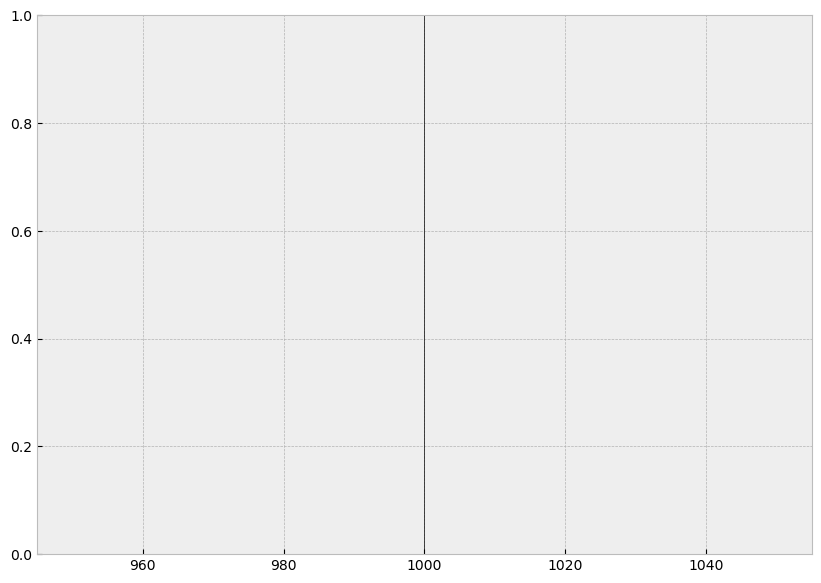

In [13]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
#analysis.load_airmasses(HA_range=[0,1,2,3,4],targ_dec=40 * u.deg)
analysis.load_airmasses(ZA_range=[0,5,10,15,20,25,30,35,40,45,50,55,60])
analysis.calculate_shifts(fibrecentre_waveref = 1.4 * u.micron,reposition=True, guide_waveref=1.4 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','R',sampling=1 * u.nm)
#analysis.load_airmasses(HA_range=[0,1,2,3,4],targ_dec=40 * u.deg)
analysis.load_airmasses(ZA_range=[0,5,10,15,20,25,30,35,40,45,50,55,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

Separation OF RED AND BLUE vs ZENITH ANGLE for VARIOUS BANDS

In [ ]:
def red_blue_separation(config):
    separations=[]
    for i in config:
        Config_regime = ConfigObj('./Architecture_parameters/'+i[0]+'_channel_conf.ini')
        sampling = -int(Config_regime[i[1]]['Bands'][i[2]]['wave_min'])+int(Config_regime[i[1]]['Bands'][i[3]]['wave_max'])
        analysis.load_wave(i[1],i[0],i[2],i[3],sampling * u.nm)
        analysis.calculate_shifts(fibrecentre_waveref = 100 * u.micron, reposition=False, guide_waveref=200 * u.micron)
        separation=[]
        for o in analysis.output_parameters['shifts']:
            separation.append(abs(o[0]-o[1]).value)
        separations.append(separation)
    return separations


In [ ]:
angles=ZA_range=np.arange(0,60)
analysis=AD_analysis()
analysis.load_airmasses(ZA_range=angles)


NIR_LR=[["NIR","LR","IY","H"],["NIR","LR","J","J"],["NIR","LR","IY","IY"],["NIR","LR","H","H"]]
NIR_HR=[["NIR","HR","IY","H"],["NIR","HR","IY","IY"],["NIR","HR","H","H"]]
VIS_LR=[["VIS","LR","B","R"],["VIS","LR","B","B"],["VIS","LR","V","V"],["VIS","LR","R","R"]]
VIS_HR=[["VIS","HR","V","R"],["VIS","HR","V","V"],["VIS","HR","R","R"]]

NIR_LR_sep=red_blue_separation(NIR_LR)
NIR_HR_sep=red_blue_separation(NIR_HR)
VIS_LR_sep=red_blue_separation(VIS_LR)
VIS_HR_sep=red_blue_separation(VIS_HR)

Zenith Angles Used


In [ ]:
weights4 = np.arange(0, 4+1)
norm4 = mpl.colors.Normalize(vmin=min(weights4), vmax=max(weights4))
cmap4_1 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Reds)
cmap4_2 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Blues)

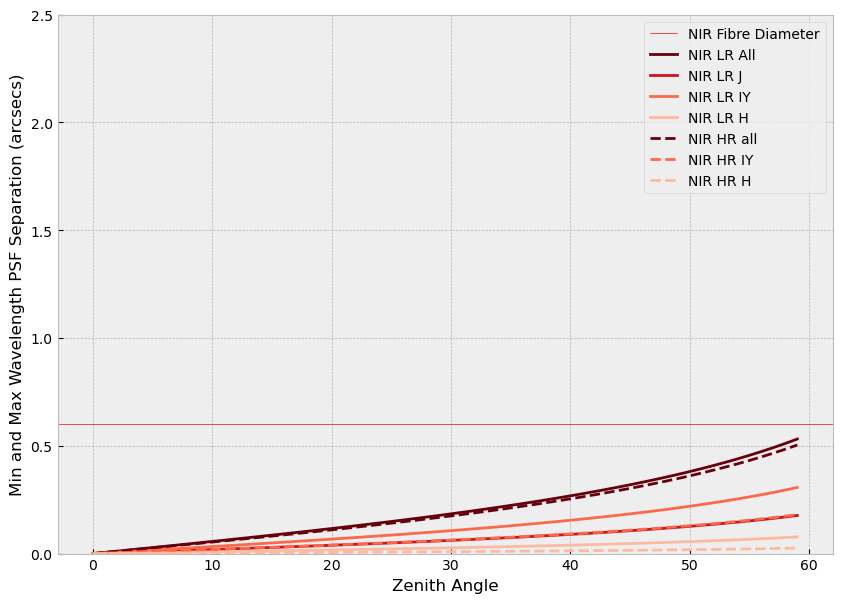

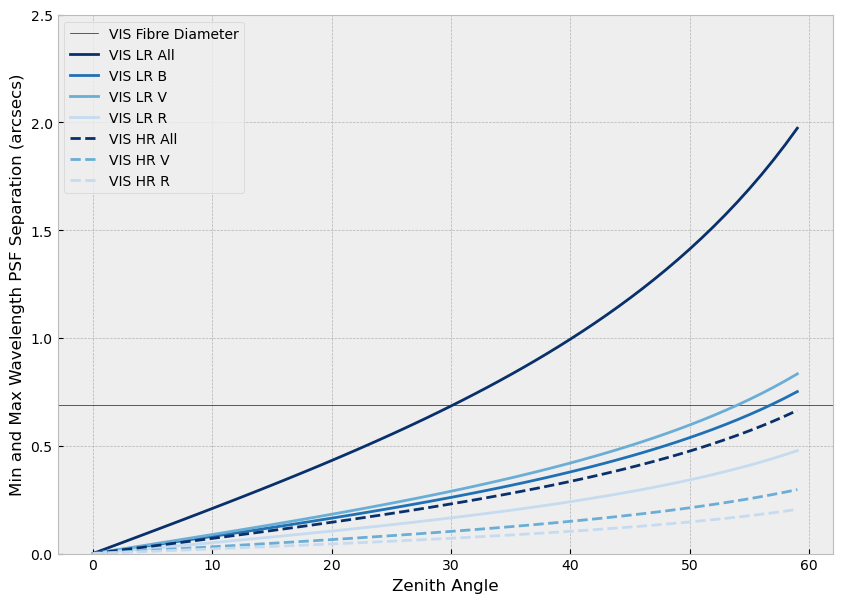

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.6,color='red',linewidth=0.5,label='NIR Fibre Diameter')
plt.plot(angles,NIR_LR_sep[0],label="NIR LR All",color=cmap4_1.to_rgba(3+1))
plt.plot(angles,NIR_LR_sep[1],label="NIR LR J",color=cmap4_1.to_rgba(2+1))
plt.plot(angles,NIR_LR_sep[2],label="NIR LR IY",color=cmap4_1.to_rgba(1+1))
plt.plot(angles,NIR_LR_sep[3],label="NIR LR H",color=cmap4_1.to_rgba(0+1))
plt.plot(angles,NIR_HR_sep[0],label="NIR HR all",color=cmap4_1.to_rgba(3+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[1],label="NIR HR IY",color=cmap4_1.to_rgba(1+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[2],label="NIR HR H",color=cmap4_1.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Separation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)
plt.savefig("IR_sep.png")
fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.69,color='blue',linewidth=0.5,label='VIS Fibre Diameter')
plt.plot(angles,VIS_LR_sep[0],label="VIS LR All",color=cmap4_2.to_rgba(3+1))
plt.plot(angles,VIS_LR_sep[1],label="VIS LR B",color=cmap4_2.to_rgba(2+1))
plt.plot(angles,VIS_LR_sep[2],label="VIS LR V",color=cmap4_2.to_rgba(1+1))
plt.plot(angles,VIS_LR_sep[3],label="VIS LR R",color=cmap4_2.to_rgba(0+1))
plt.plot(angles,VIS_HR_sep[0],label="VIS HR All",color=cmap4_2.to_rgba(3+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[1],label="VIS HR V",color=cmap4_2.to_rgba(1+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[2],label="VIS HR R",color=cmap4_2.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Separation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)
plt.savefig("VIS_sep.png")

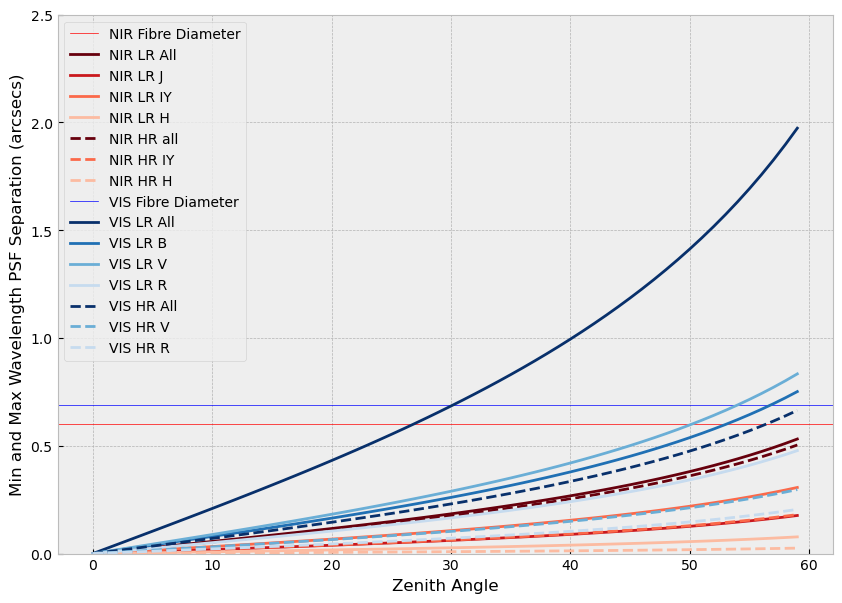

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.6,color='red',linewidth=0.5,label='NIR Fibre Diameter')
plt.plot(angles,NIR_LR_sep[0],label="NIR LR All",color=cmap4_1.to_rgba(3+1))
plt.plot(angles,NIR_LR_sep[1],label="NIR LR J",color=cmap4_1.to_rgba(2+1))
plt.plot(angles,NIR_LR_sep[2],label="NIR LR IY",color=cmap4_1.to_rgba(1+1))
plt.plot(angles,NIR_LR_sep[3],label="NIR LR H",color=cmap4_1.to_rgba(0+1))
plt.plot(angles,NIR_HR_sep[0],label="NIR HR all",color=cmap4_1.to_rgba(3+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[1],label="NIR HR IY",color=cmap4_1.to_rgba(1+1),linestyle='--')
plt.plot(angles,NIR_HR_sep[2],label="NIR HR H",color=cmap4_1.to_rgba(0+1),linestyle='--')
plt.axhline(0.69,color='blue',linewidth=0.5,label='VIS Fibre Diameter')
plt.plot(angles,VIS_LR_sep[0],label="VIS LR All",color=cmap4_2.to_rgba(3+1))
plt.plot(angles,VIS_LR_sep[1],label="VIS LR B",color=cmap4_2.to_rgba(2+1))
plt.plot(angles,VIS_LR_sep[2],label="VIS LR V",color=cmap4_2.to_rgba(1+1))
plt.plot(angles,VIS_LR_sep[3],label="VIS LR R",color=cmap4_2.to_rgba(0+1))
plt.plot(angles,VIS_HR_sep[0],label="VIS HR All",color=cmap4_2.to_rgba(3+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[1],label="VIS HR V",color=cmap4_2.to_rgba(1+1),linestyle='--')
plt.plot(angles,VIS_HR_sep[2],label="VIS HR R",color=cmap4_2.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Separation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)
plt.savefig("All_sep.png")

TRANSMISSION vs WAVELENGTH for VARIOUS AIRMASS and VARIOUS TRANSMISSION METHODS


In [ ]:
#allow beta to be an argument
def multi_trans_plot(input_parameters,output_parameters,conditions,methods=[1,2],normalise='none',scale=0.01,beta=2.5):
    airmasses=output_parameters['airmasses']
    ZA_range=input_parameters['ZA_range']
    HA_range=input_parameters['HA_range']
    fibrecentre_waveref=input_parameters['fibrecentre_waveref']
    method_options=["analytical","numerical gaussian","numerical moffat"]
    method_labels=["ana. gaussian","num. gaussian","num. moffat"]
    style=["--","-","-."]
    fig, ax = plt.subplots(figsize=(10,7))
    plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Fibre Centre Wavelength')

    for o in methods:
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method=method_options[o],scale=scale,beta=beta)
        
        wave_wavelengths=output_parameters['wave_wavelengths']
        fibre_diameter=output_parameters['fibre_diameter']
        wave_transmissions=output_parameters['wave_transmissions']
        guide_waveref=input_parameters['guide_waveref']
        median_FWHM=input_parameters['median_FWHM']
        median_FWHM_lambda=input_parameters['median_FWHM_lambda']
        kolb_factor=input_parameters['kolb_factor']
        regime=input_parameters['regime']
        res=input_parameters['res']
        k_lim=input_parameters['k_lim']
        FWHM_change=input_parameters['FWHM_change']
        scale=input_parameters['scale']
        method=input_parameters['method']
        beta=input_parameters['beta']
        print(beta)
        band=input_parameters['band']
        reposition=input_parameters['reposition']
        targ_dec=input_parameters['targ_dec']

        weights = np.arange(1, len(airmasses)+1)
        norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
        cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)

        if ZA_range !=[]: #Zenith angle plots
            if normalise == "zenith":
                print("Normalised to Zenith Transmission")
                if FWHM_change==True:
                    zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                zenith_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
                zenith_shifts=atm_shift.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
                if method == "analytical":
                    zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
                if method == "numerical gaussian":
                    zenith_transmission = []
                    for i in range(0,len(zenith_FWHMs)):
                        zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
                if method == "numerical moffat":
                    zenith_transmission = []
                    for i in range(0,len(zenith_FWHMs)):
                        zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f, %s' %(ZA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])    
                plt.ylabel("Transmission Relative to Zenith")

            if normalise == "centre":
                print("Normalised to Reference Wavelength Transmission")
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]          
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='ZA = %2.0f, %s' %(ZA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])    
                plt.ylabel("Transmission Relative to Reference Wavelength")

            if normalise =="both":
                print("Normalised to Both Zenith Transmission and Reference Wavelength Transmission")
                if FWHM_change==True:
                    zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                zenith_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
                zenith_shifts=atm_shift.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
                if method == "analytical":
                    zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
                if method == "numerical gaussian":
                    zenith_transmission = []
                    for i in range(0,len(zenith_FWHMs)):
                        zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
                if method == "numerical moffat":
                    zenith_transmission = []
                    for i in range(0,len(zenith_FWHMs)):
                        zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(zenith_transmission)[peak]),label='ZA = %2.0f, %s' %(ZA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])
                    plt.ylabel("Transmission (Normalised to Zenith and Ref. Wave. Transmission)")

            if normalise == "none":
                print("No Normalisation, Raw Transmission")
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='ZA = %2.0f, %s' %(ZA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])
                plt.ylabel("Transmission")

            plt.xlabel("Wavelength [nm]")
            plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Repos = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,reposition))
            plt.ylim(0,1.3)
            plt.legend()

        if HA_range != []: #HA plots
            meridian_airmass=output_parameters['meridian_airmass']
            if normalise == "meridian":
                print("Normalised to Target's Meridian Transmission (LHA=0h)")
                if FWHM_change==True:
                    merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                merid_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
                merid_shifts=atm_shift.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
                if method == "analytical":
                    merid_transmission = trans_calc.analytical_gaussian(fibre_diameter,merid_FWHMs,merid_shifts,k_lim)
                if method == "numerical gaussian":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale))
                if method == "numerical moffat":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission),label='HA = %2.2fh, %s' %(HA_range[i], method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])
                plt.ylabel("Transmission Relative to Target's at Meridian")

            if normalise == "centre":
                print("Normalised to Reference Wavelength Transmission")
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='HA = %2.2fh, %s' %(HA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])
                plt.ylabel("Transmission Relative to Reference Wavelength")

            if normalise =="both":
                print("Normalised to Both Target's Meridian Transmission and Reference Wavelength Transmission")
                if FWHM_change==True:
                    merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                merid_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
                merid_shifts=atm_shift.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
                if method == "analytical":
                    merid_transmission = trans_calc.analytical_gaussian(fibre_diameter,merid_FWHMs,merid_shifts,k_lim)
                if method == "numerical gaussian":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale))
                if method == "numerical moffat":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(merid_transmission)[peak]),label='HA = %2.0fh, %s' %(HA_range[i],method_labels[o]),color=cmap.to_rgba(i+1),linestyle=style[o])
                    plt.ylabel("Transmission (Normalised to Target at Meridian and Ref. Wave. Transmission)")

            if normalise == "none":
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='HA = %2.2fh' %(HA_range[i]),color=cmap.to_rgba(i+1),linestyle=style[o])
                plt.ylabel("Transmission")

            plt.xlabel("Wavelength [nm]")
            plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Dec = %2.2f, Repos = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,targ_dec.value,reposition))
            plt.ylim(0,1.3)
            plt.legend()

Zenith Angles Used
2.5
No Normalisation, Raw Transmission
2.5
No Normalisation, Raw Transmission


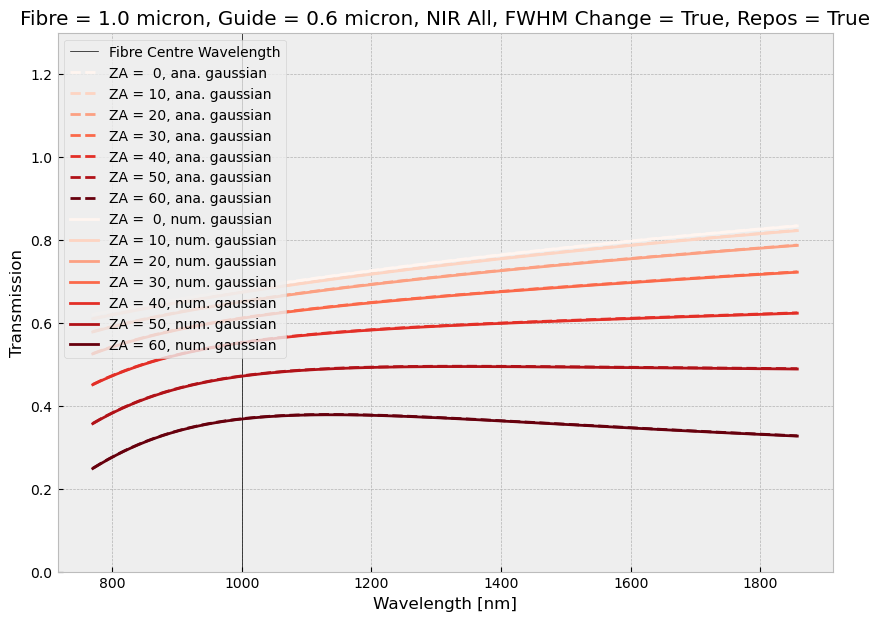

In [ ]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
multi_trans_plot(analysis.input_parameters,analysis.output_parameters,analysis.conditions,methods=[0,1],scale=0.01)

Zenith Angles Used
2.5
No Normalisation, Raw Transmission
2.5
No Normalisation, Raw Transmission


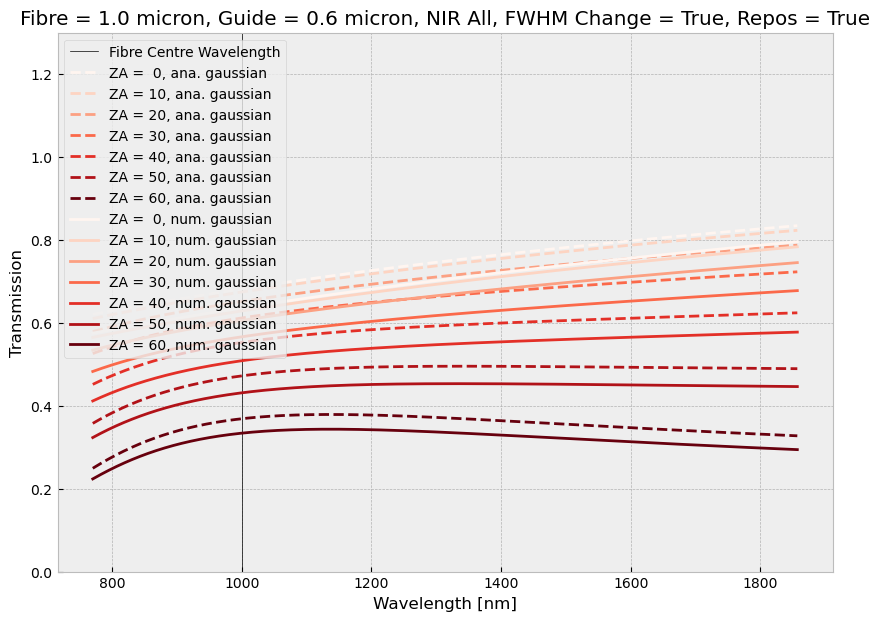

In [ ]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
multi_trans_plot(analysis.input_parameters,analysis.output_parameters,analysis.conditions,methods=[0,1],scale=0.1)

Zenith Angles Used
2.5
No Normalisation, Raw Transmission
2.5
No Normalisation, Raw Transmission


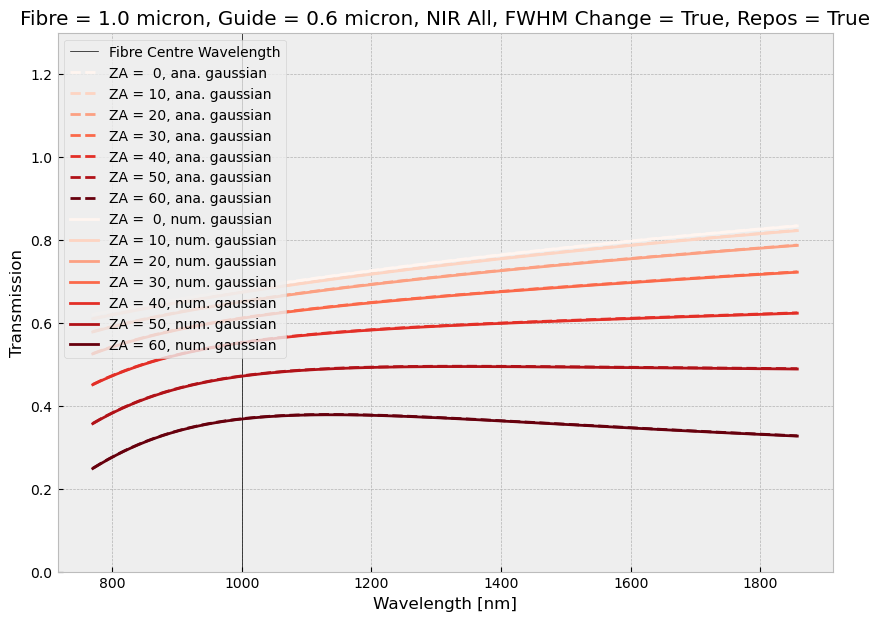

In [ ]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
multi_trans_plot(analysis.input_parameters,analysis.output_parameters,analysis.conditions,methods=[0,1],scale=0.01)

Zenith Angles Used
2.5
No Normalisation, Raw Transmission
2.5
No Normalisation, Raw Transmission


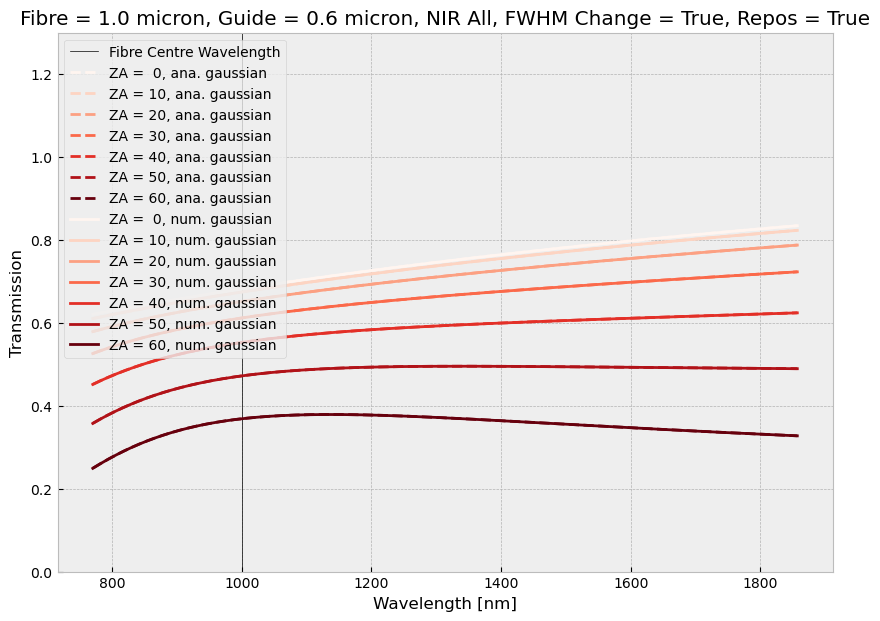

In [ ]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
multi_trans_plot(analysis.input_parameters,analysis.output_parameters,analysis.conditions,methods=[0,1],scale=0.001)

TRANSMISSION vs WAVELENGTH for VARIOUS AIRMASSES with REPOSITION INTERVALS

In [14]:
def calculate_integtransmissions(self, start_HA, end_HA, repos_interval, intervals, method="analytical"):

    HA_ranges=[]
    for i in range(0,int((end_HA-start_HA)/repos_interval)):
        HA_ranges.append(np.linspace(i*repos_interval+start_HA,(i+1)*repos_interval+start_HA,intervals))
    
    transmissions=[]

    for i in range(0,int((end_HA-start_HA)/repos_interval)):
        self.load_airmasses(HA_range=HA_ranges[i],targ_dec=0 * u.deg)
        self.calculate_snapshifts(fibrecentre_waveref = 1 * u.micron,plot=False, reposition=False, guide_waveref=0.6 * u.micron)
        self.calculate_snaptransmissions(FWHM_change=True,method=method)
        transmissions.append(self.output_parameters['wave_transmissions'])

    weights = np.arange(0, int(intervals*(end_HA-start_HA)/repos_interval)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
    style=['-','--','-.']

    fig, ax = plt.subplots(figsize=(10,7))
    for i in range(0,len(transmissions)):
        for o in range(0,len(transmissions[i])):
            factor=0
            if o == 0: 
                factor = -1
        
            plt.plot(self.output_parameters['wave_wavelengths'],transmissions[i][o],linestyle=style[o],color=cmap.to_rgba(o+i*len(transmissions[0])+factor),label="Repos = %2.2fh, HA = %2.2fh" %(i,HA_ranges[i][o]))
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission")
    plt.ylim(0,1.1)

In [15]:



def integration_trans_plot(input_parameters,output_parameters,start_HA, end_HA, repos_interval, intervals, method="analytical"):
    HA_ranges=[]
    for i in range(0,int((end_HA-start_HA)/repos_interval)):
        HA_ranges.append(np.linspace(i*repos_interval+start_HA,(i+1)*repos_interval+start_HA,intervals))

    transmissions=[]

    for i in range(0,int((end_HA-start_HA)/repos_interval)):
        analysis.load_airmasses(HA_range=HA_ranges[i],targ_dec=0 * u.deg)
        analysis.calculate_shifts(fibrecentre_waveref = 1.1 * u.micron,reposition=False, guide_waveref=0.6 * u.micron)
        analysis.calculate_transmissions(FWHM_change=True,method=method)
        transmissions.append(output_parameters['wave_transmissions'])

    weights = np.arange(0, int(intervals*(end_HA-start_HA)/repos_interval)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
    style=['-','--','-.']
    

    fig, ax = plt.subplots(figsize=(10,7))
    plt.axvline(x=1000, label='Fibre Centre',linewidth=0.5,color='black')
    for i in range(0,len(transmissions)):
        for o in range(0,len(transmissions[i])):
            factor=0
            if o == 0: 
                factor = -1
            #plt.plot(output_parameters['wave_wavelengths'],transmissions[i][o],linestyle=style[o],color=cmap.to_rgba(o+i*len(transmissions[0])+factor),label="HA = %2.2fh" %(HA_ranges[i][o]))
            plt.plot(output_parameters['wave_wavelengths'],transmissions[i][o],color=cmap.to_rgba(o+i*len(transmissions[0])+factor),label="HA = %2.2fh" %(HA_ranges[i][o]))
    plt.legend()
    plt.title("Fibre Centre = 1.1 micron, Guide Wavelength = 0.6 micron, Target Dec = 0 degrees")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission")
    plt.ylim(0,1.1)
    plt.savefig("Graph.png")

HA used
Target goes below Horizon above/below HA of +/- 6.0h


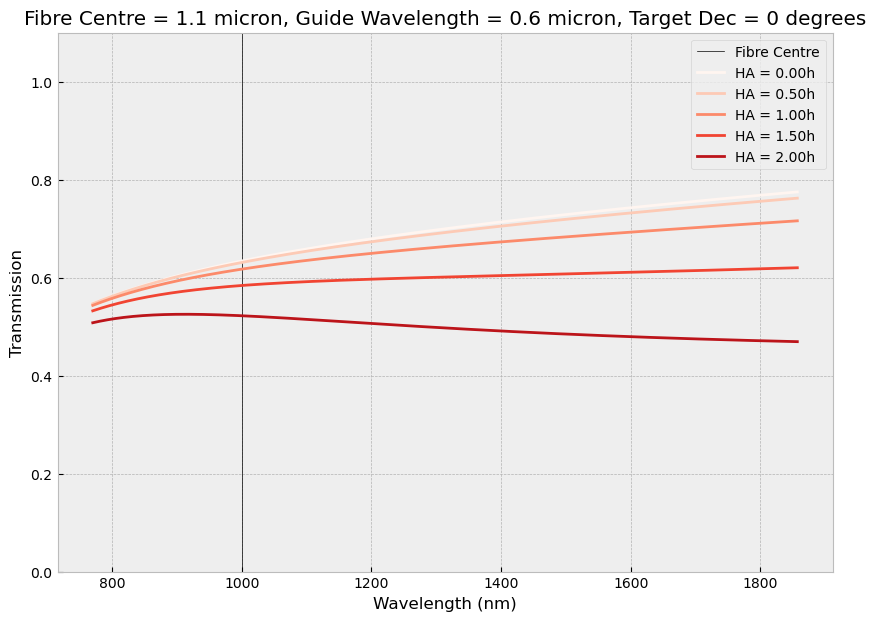

In [16]:
start_HA=0
end_HA=2
repos_interval=2
intervals=5
method="analytical"

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
integration_trans_plot(analysis.input_parameters,analysis.output_parameters,start_HA,end_HA,repos_interval,intervals)

TRANSMISSION vs WAVELENGTH for VARIOUS AIRMASS and VARIOUS MOFFAT BETAS


In [17]:
#allow beta to be an argument
def multi_moffat_plot(input_parameters,output_parameters,conditions,betas=[2.5,3.5,4.765],normalise='none',scale=0.01):
    airmasses=output_parameters['airmasses']
    ZA_range=input_parameters['ZA_range']
    HA_range=input_parameters['HA_range']
    fibrecentre_waveref=input_parameters['fibrecentre_waveref']
    style=["-","--","-."]
    fig, ax = plt.subplots(figsize=(10,7))
    plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Fibre Centre Wavelength')

    for count, o in enumerate(betas,start=0):
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=scale,beta=o)
        
        wave_wavelengths=output_parameters['wave_wavelengths']
        fibre_diameter=output_parameters['fibre_diameter']
        wave_transmissions=output_parameters['wave_transmissions']
        guide_waveref=input_parameters['guide_waveref']
        median_FWHM=input_parameters['median_FWHM']
        median_FWHM_lambda=input_parameters['median_FWHM_lambda']
        kolb_factor=input_parameters['kolb_factor']
        regime=input_parameters['regime']
        res=input_parameters['res']
        k_lim=input_parameters['k_lim']
        FWHM_change=input_parameters['FWHM_change']
        scale=input_parameters['scale']
        method=input_parameters['method']
        beta=input_parameters['beta']
        print(beta)
        band=input_parameters['band']
        reposition=input_parameters['reposition']
        targ_dec=input_parameters['targ_dec']

        weights = np.arange(1, len(airmasses)+1)
        norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
        cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)

        if ZA_range !=[]: #Zenith angle plots
            if normalise == "zenith":
                print("Normalised to Zenith Transmission")
                if FWHM_change==True:
                    zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                zenith_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
                zenith_shifts=atm_shift.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='ZA = %2.0f, B = %2.2f' %(ZA_range[i],o),color=cmap.to_rgba(i+1),linestyle=style[count])    
                plt.ylabel("Transmission Relative to Zenith")

            if normalise == "centre":
                print("Normalised to Reference Wavelength Transmission")
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]          
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='ZA = %2.0f, B = %2.2f' %(ZA_range[i],o),color=cmap.to_rgba(i+1),linestyle=style[count])    
                plt.ylabel("Transmission Relative to Reference Wavelength")

            if normalise =="both":
                print("Normalised to Both Zenith Transmission and Reference Wavelength Transmission")
                if FWHM_change==True:
                    zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                zenith_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
                zenith_shifts=atm_shift.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(zenith_transmission)[peak]),label='ZA = %2.0f, B = %2.2f' %(ZA_range[i],o),color=cmap.to_rgba(i+1),linestyle=style[count])
                    plt.ylabel("Transmission (Normalised to Zenith and Ref. Wave. Transmission)")

            if normalise == "none":
                print("No Normalisation, Raw Transmission")
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='ZA = %2.0f, B = %2.2f' %(ZA_range[i],o),color=cmap.to_rgba(i+1),linestyle=style[count])
                plt.ylabel("Transmission")

            plt.xlabel("Wavelength [nm]")
            plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Repos = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,reposition))
            plt.ylim(0,1.3)
            plt.legend()

        if HA_range != []: #HA plots
            meridian_airmass=output_parameters['meridian_airmass']
            if normalise == "meridian":
                print("Normalised to Target's Meridian Transmission (LHA=0h)")
                if FWHM_change==True:
                    merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                merid_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
                merid_shifts=atm_shift.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
                merid_transmission = []
                for i in range(0,len(merid_FWHMs)):
                    merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission),label='HA = %2.2fh, B = %2.2f' %(HA_range[i], o),color=cmap.to_rgba(i+1),linestyle=style[count])
                plt.ylabel("Transmission Relative to Target's at Meridian")

            if normalise == "centre":
                print("Normalised to Reference Wavelength Transmission")
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='HA = %2.2fh, B = %2.2f' %(HA_range[i], o),color=cmap.to_rgba(i+1),linestyle=style[count])
                plt.ylabel("Transmission Relative to Reference Wavelength")

            if normalise =="both":
                print("Normalised to Both Target's Meridian Transmission and Reference Wavelength Transmission")
                if FWHM_change==True:
                    merid_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,meridian_airmass,median_FWHM,median_FWHM_lambda,kolb_factor)
                else:
                    merid_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
                merid_centre_shift=atm_shift.diff_shift(fibrecentre_waveref,meridian_airmass,guide_waveref,conditions)
                merid_shifts=atm_shift.diff_shift(wave_wavelengths,meridian_airmass,guide_waveref,conditions)-merid_centre_shift
                if method == "analytical":
                    merid_transmission = trans_calc.analytical_gaussian(fibre_diameter,merid_FWHMs,merid_shifts,k_lim)
                if method == "numerical gaussian":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale))
                if method == "numerical moffat":
                    merid_transmission = []
                    for i in range(0,len(merid_FWHMs)):
                        merid_transmission.append(trans_calc.numerical_moffat(fibre_diameter,merid_FWHMs[i],merid_shifts[i],scale,beta=beta))
                peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(merid_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(merid_transmission)[peak]),label='HA = %2.2fh, B = %2.2f' %(HA_range[i], o),color=cmap.to_rgba(i+1),linestyle=style[count])
                    plt.ylabel("Transmission (Normalised to Target at Meridian and Ref. Wave. Transmission)")

            if normalise == "none":
                for i in range(0,len(wave_transmissions)):
                    plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='HA = %2.2fh' %(HA_range[i]),color=cmap.to_rgba(i+1),linestyle=style[count])
                plt.ylabel("Transmission")

            plt.xlabel("Wavelength [nm]")
            plt.title('Fibre = %s, Guide = %s, %s %s, FWHM Change = %s, Dec = %2.2f, Repos = %s' %(fibrecentre_waveref,guide_waveref,regime,band,FWHM_change,targ_dec.value,reposition))
            plt.ylim(0,1.3)
            plt.legend()

Zenith Angles Used
2.5
No Normalisation, Raw Transmission
3.5
No Normalisation, Raw Transmission
4.765
No Normalisation, Raw Transmission


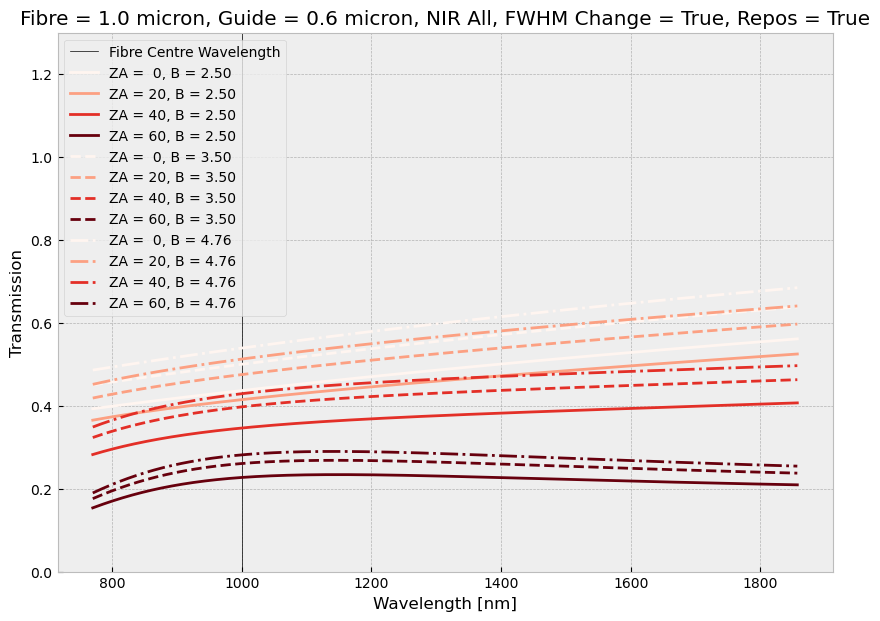

In [18]:
analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,20,40,60])
analysis.calculate_shifts(fibrecentre_waveref = 1 * u.micron,reposition=True, guide_waveref=0.6 * u.micron)
multi_moffat_plot(analysis.input_parameters,analysis.output_parameters,analysis.conditions,scale=0.1)

In [19]:
def trans_plot2(input_parameters,output_parameters,conditions,normalise="none"):
    """
    Plots the wavelength vs transmission graph 
    Comes after load_wave, load_airmasses, calculate_snapshifts, calculate_snaptransmissions

    INPUTS:
    normalise: string, "none", "zenith", "centre", "both"
        what to normalise the transmission to; either no normalisation, relative to zenith, relative to transmission or fibre centre wavelength,
        or both the latter

    OUTPUTS:
    Graphs:
        corresponding graph
    """
    airmasses=output_parameters['airmasses']
    ZA_range=input_parameters['ZA_range']
    HA_range=input_parameters['HA_range']
    
    wave_wavelengths=output_parameters['wave_wavelengths']
    fibre_diameter=output_parameters['fibre_diameter']
    wave_transmissions=output_parameters['wave_transmissions']

    fibrecentre_waveref=input_parameters['fibrecentre_waveref']
    guide_waveref=input_parameters['guide_waveref']
    median_FWHM=input_parameters['median_FWHM']
    median_FWHM_lambda=input_parameters['median_FWHM_lambda']
    kolb_factor=input_parameters['kolb_factor']
    regime=input_parameters['regime']
    res=input_parameters['res']
    k_lim=input_parameters['k_lim']
    FWHM_change=input_parameters['FWHM_change']
    scale=input_parameters['scale']
    method=input_parameters['method']
    beta=input_parameters['beta']
    band=input_parameters['band']
    reposition=input_parameters['reposition']
    targ_dec=input_parameters['targ_dec']

    weights = np.arange(1, len(airmasses)+1)
    norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)

    if ZA_range !=[]: #Zenith angle plots
        fig, ax = plt.subplots(figsize=(10,7))
        plt.axvline(fibrecentre_waveref.value*1000,color='black',linewidth=0.5,label='Fibre Centre Wavelength')

        if normalise == "zenith":
            print("Normalised to Zenith Transmission")
            if FWHM_change==True:
                zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            zenith_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
            zenith_shifts=atm_diff.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
            if method == "analytical":
                zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
            if method == "numerical gaussian":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
            if method == "numerical moffat":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Zenith")

        if normalise == "centre":
            print("Normalised to Reference Wavelength Transmission")
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]          
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(wave_transmissions[i][peak]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))    
            plt.ylabel("Transmission Relative to Fibre Centre Wavelength")

        if normalise =="both":
            print("Normalised to Both Zenith Transmission and Reference Wavelength Transmission")
            if FWHM_change==True:
                zenith_FWHMs=trans_calc.calculate_FWHM(wave_wavelengths,1,median_FWHM,median_FWHM_lambda,kolb_factor)
            else:
                zenith_FWHMs=np.full(len(wave_wavelengths),median_FWHM) * u.arcsec
            zenith_centre_shift=atm_diff.diff_shift(fibrecentre_waveref,1,guide_waveref,conditions)
            zenith_shifts=atm_diff.diff_shift(wave_wavelengths,1,guide_waveref,conditions)-zenith_centre_shift
            if method == "analytical":
                zenith_transmission = trans_calc.analytical_gaussian(fibre_diameter,zenith_FWHMs,zenith_shifts,k_lim)
            if method == "numerical gaussian":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_gaussian(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale))
            if method == "numerical moffat":
                zenith_transmission = []
                for i in range(0,len(zenith_FWHMs)):
                    zenith_transmission.append(trans_calc.numerical_moffat(fibre_diameter,zenith_FWHMs[i],zenith_shifts[i],scale,beta=beta))
            peak = np.where(wave_wavelengths.value==fibrecentre_waveref.value*1000)[0][0]
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i])/np.array(zenith_transmission)/(np.array(wave_transmissions)[i][peak]/np.array(zenith_transmission)[peak]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))
                plt.ylabel("Transmission (Normalised to Zenith and Ref. Wave. Transmission)")

        if normalise == "none":
            print("No Normalisation, Raw Transmission")
            for i in range(0,len(wave_transmissions)):
                plt.plot(wave_wavelengths,np.array(wave_transmissions[i]),label='Zenith Angle = %2.0f' %(ZA_range[i]),color=cmap.to_rgba(i+1))
            plt.ylabel("Transmission")

        plt.xlabel("Wavelength [nm]")
        plt.title('Fibre Centre = %s, %s %s' %(fibrecentre_waveref,regime,band))
        plt.ylim(0,1.3)
        plt.legend()
        
        plt.savefig("Graph.png")


In [20]:
# 1) VIS and NIR observing independently (Throughput vs lambda for several airmass)
# - VIS LR1 with a reference wavelength inside the bandwidth ( try to set the reference wavelength in a place where the losses are minimized along the full band)
# - VIS LR2 with a reference wavelength inside the bandwidth 
# - NIR LR the 3 bands at the same time with a single reference wavelength for all (lambda_ref to minimize losses in the all NIR band) 

Zenith Angles Used
Normalised to Reference Wavelength Transmission


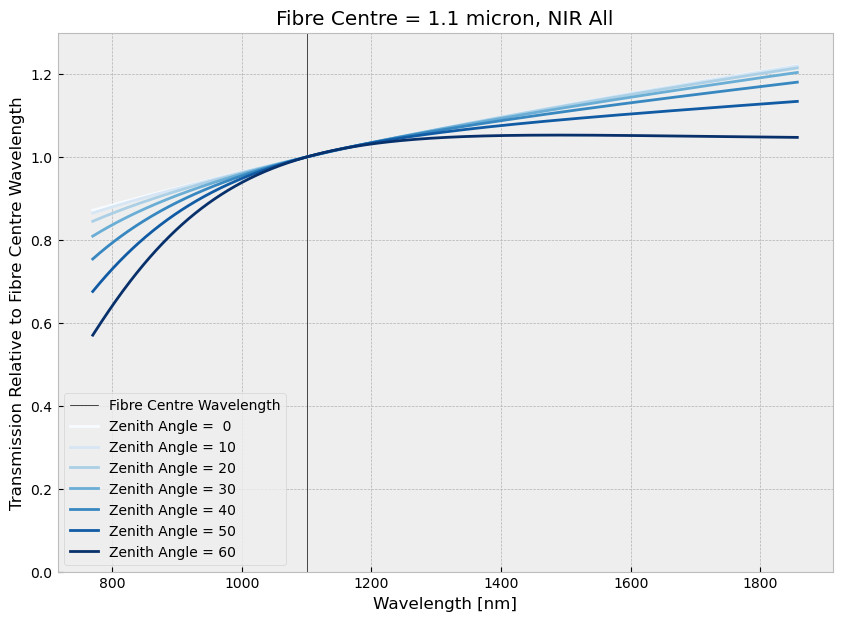

In [21]:
# analysis=AD_analysis()
# analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
# analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
# analysis.calculate_shifts(fibrecentre_waveref = 0.43 * u.micron,reposition=True, guide_waveref=0.43 * u.micron)
# analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
# conditions=analysis.conditions
# trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

# analysis=AD_analysis()
# analysis.load_wave('LR','VIS','V','V',sampling=1 * u.nm)
# analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
# analysis.calculate_shifts(fibrecentre_waveref = 0.55 * u.micron,reposition=True, guide_waveref=0.55 * u.micron)
# analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
# trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 1.1 * u.micron,reposition=True, guide_waveref=5 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

Zenith Angles Used
Normalised to Reference Wavelength Transmission
[-0.13178789 -0.12685759 -0.12196829 -0.11711952 -0.11231084 -0.10754179
 -0.10281192 -0.09812081 -0.09346801 -0.08885311 -0.08427568 -0.0797353
 -0.07523159 -0.07076412 -0.06633251 -0.06193636 -0.05757529 -0.05324892
 -0.04895687 -0.04469878 -0.04047428 -0.03628301 -0.03212461 -0.02799874
 -0.02390506 -0.01984321 -0.01581287 -0.0118137  -0.00784538 -0.00390759
  0.          0.0038777   0.00772581  0.01154465  0.01533451  0.0190957
  0.0228285   0.02653322  0.03021012  0.0338595   0.03748164  0.0410768
  0.04464527  0.04818731  0.05170319  0.05519316  0.05865749  0.06209643
  0.06551023  0.06889915  0.07226342  0.07560329  0.07891899  0.08221078
  0.08547887  0.0887235   0.09194489  0.09514328  0.09831888  0.10147192
  0.10460261  0.10771116  0.11079778  0.1138627   0.1169061   0.1199282
  0.12292919  0.12590928  0.12886867] arcsec
Zenith Angles Used
Normalised to Reference Wavelength Transmission


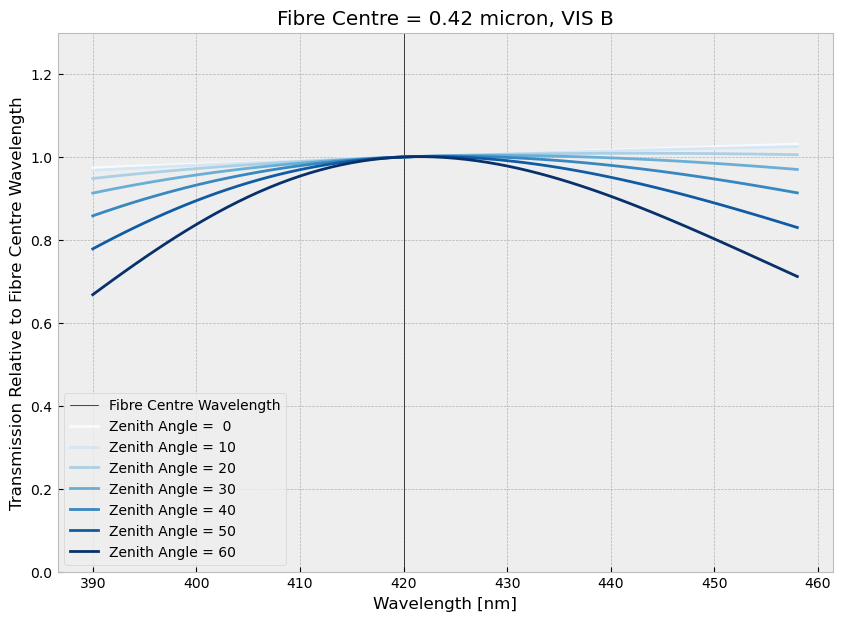

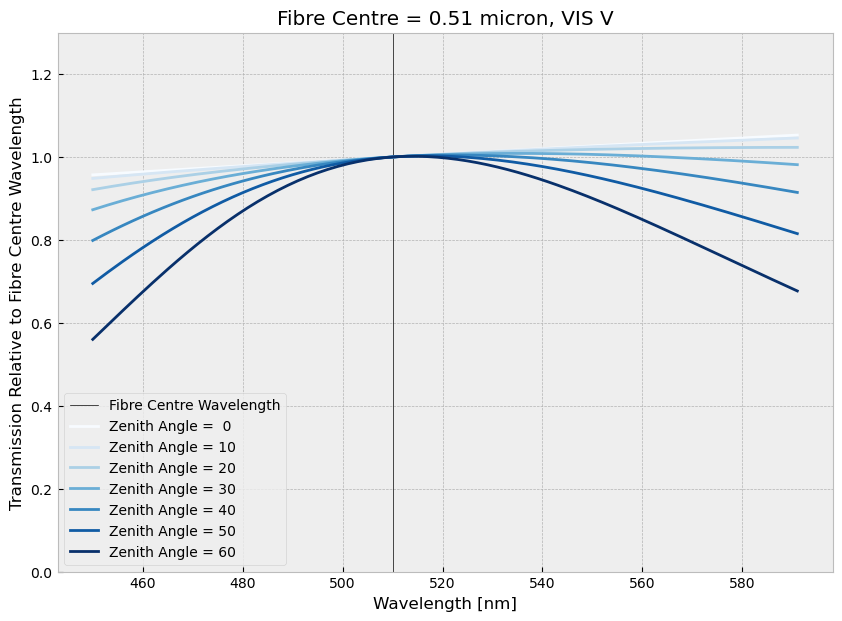

In [27]:
analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 0.42 * u.micron,reposition=True, guide_waveref=0.42 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

print(analysis.output_parameters['shifts'][3])

analysis=AD_analysis()
analysis.load_wave('LR','VIS','V','V',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_shifts(fibrecentre_waveref = 0.51 * u.micron,reposition=True, guide_waveref=0.51 * u.micron)
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")

# analysis=AD_analysis()
# analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
# analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
# analysis.calculate_shifts(fibrecentre_waveref = 1.1 * u.micron,reposition=True, guide_waveref=5 * u.micron)
# analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01, beta=2.5)
# trans_plot2(analysis.input_parameters,analysis.output_parameters,conditions,normalise="centre")
